Accuracy : 0.3333333333333333


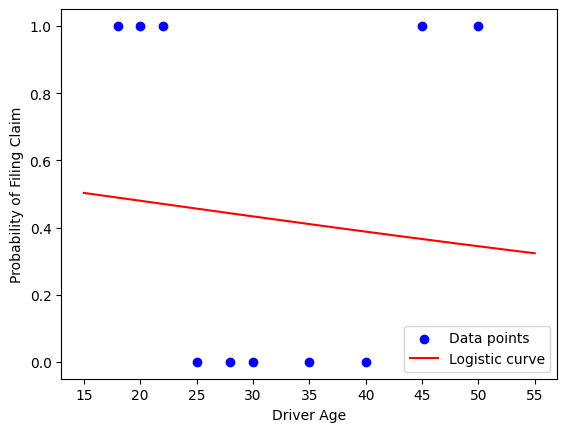

In [ ]:
# # Logistic Regression
# # Scenario‑Based Question 🚗
# # Context:
# # A car insurance company wants to predict whether a driver is likely to file a claim in the next year.
# They collect data on drivers’ ages and whether they filed a claim
# #  (1 = claim filed, 0 = no claim).

# Question:
# Using logistic regression, build a model that predicts the probability of filing a claim based on driver age.
# - Split the dataset into training and testing sets.
# - Train a logistic regression model.
# - Evaluate its accuracy on the test set.
# - Plot the logistic curve showing how the probability of filing a claim changes with age.
# - Interpret the curve: At what age does the probability of filing a claim cross 50%?

# This context makes logistic regression relatable to business and risk management, showing students
# how the same technique applies in industries like insurance.
# Would you like me to prepare multiple scenario variations (e.g., healthcare, retail, sports) so you can rotate them in class and keep students engaged?

# Logistic Regression Demo: Insurance Claim Prediction
# Context: Predicting whether a driver files a claim based on age


import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = np.array([[18],[20],[22],[25],[28],[30],[35],[40],[45],[50]])
y = np.array([1,1,1,0,0,0,0,0,1,1])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3 ,random_state = 42)

model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)


print("Accuracy :",accuracy_score(y_test,y_pred))

plt.scatter(X,y,color="blue",label = "Data points")
x_range = np.linspace(15,55,200).reshape(-1,1)
y_prob = model.predict_proba(x_range)[:,1]
plt.plot(x_range,y_prob,color="red",label="Logistic curve")
plt.xlabel("Driver Age")
plt.ylabel("Probability of Filing Claim")
plt.legend()
plt.show()

In [ ]:
# Scenario 🏥
# A hospital wants to predict whether patients are at risk of developing diabetes based on their BMI (Body Mass Index). They collect data from 10 patients,
#  recording BMI values and whether the patient was diagnosed with diabetes (1 = diabetes, 0 = no diabetes).

import pandas as pd
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('BMI_dataset - Sheet1.csv')
df.columns = df.columns.str.strip()

X = df[['BMI']]
y = df['Diabetes']

model = LogisticRegression()
model.fit(X, y)

new_data = pd.DataFrame([[31]], columns=['BMI'])
prediction = model.predict(new_data)
probability = model.predict_proba(new_data)

print(f"Intercept: {model.intercept_[0]:.4f}")
print(f"Coefficient: {model.coef_[0][0]:.4f}")
print(f"Prediction for BMI 31: {'Diabetes' if prediction[0] == 1 else 'No Diabetes'}")
print(f"Probability of Diabetes: {probability[0][1]:.2%}")

Intercept: -23.7776
Coefficient: 0.9000
Prediction for BMI 31: Diabetes
Probability of Diabetes: 98.40%


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

# Features: [word_count, has_link, caps_ratio]
X = np.array([
    [50, 1, 0.8],   # SPAM
    [200, 0, 0.1],  # Not spam
    [30, 1, 0.9],   # SPAM
    [180, 0, 0.05], # Not spam
    [10, 1, 0.95],  # SPAM
    [220, 0, 0.08], # Not spam
])
y = np.array([1, 0, 1, 0, 1, 0])  # 1=Spam, 0=Not spam

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)
proba=model.predict_proba(X_test)[:,1]

#Predict
print("Predictions:",y_pred)
print("Probabilities:",proba.round(2))
print("Accuracy :" ,accuracy_score(y_test,y_pred))

#Try a new email
new_email = [[15,1,0.88]]
print("New email is SPAM ?",model.predict(new_email)[0])

Predictions: [1 0]
Probabilities: [1. 0.]
Accuracy : 1.0
New email is SPAM ? 1


In [ ]:
# Scenario 🎬
# A streaming platform wants to recommend movies to users based on their preferences.
#  Each movie is rated on three aspects:
# - Action Rating (how action‑packed it is)
# - Comedy Rating (how funny it is)
# - Drama Rating (how emotional it is)
# The platform collects data from past users about whether they liked (1) or didn’t like (0) certain movies.

# Question for Students
# Using the K‑Nearest Neighbors (KNN) algorithm:
# - Split the dataset into training and testing sets.
# - Scale the features (important for KNN).
# - Train models with different values of K (e.g., 1, 3, 5). Compare their accuracies.
# - Select the best model and predict whether a new user who prefers [Action=4, Comedy=2, Drama=4] will like the movie.
# - Discuss: How does changing K affect the model’s predictions?

# This scenario makes KNN relatable to recommendation systems like Netflix or Spotify, showing students how algorithms decide what they might enjoy.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Movie dataset
# Features: [action_rating, comedy_rating, drama_rating]
# Label:    1=Will Like, 0=Won't Like
X = [[5,2,3],[4,1,4],[1,5,2],[2,4,1],[5,1,5],
     [3,5,1],[1,4,3],[5,3,4],[2,1,4],[3,4,2]]
y = [1, 1, 0, 0, 1, 0, 0, 1, 1, 0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# Scale features (IMPORTANT for KNN!)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

# Try different values of K
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    acc = accuracy_score(y_test, knn.predict(X_test))
    print(f"K={k}  Accuracy={acc:.2f}")

# Best model — predict new user
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train, y_train)
new_user = scaler.transform([[4, 2, 4]])
print("Will they like it?", best_knn.predict(new_user)[0])




K=1  Accuracy=1.00
K=3  Accuracy=1.00
K=5  Accuracy=1.00
Will they like it? 1


In [ ]:
# Scenario 🩺
# A fitness app wants to predict whether a person is at risk of heart disease based on three lifestyle indicators:
# - Exercise Level (hours of physical activity per week)
# - Diet Quality (rating from 1–5, higher = healthier)
# - Stress Level (rating from 1–5, higher = more stress)
# The app collects data from users and labels them as 1 = At Risk or 0 = Not at Risk.
# Question for Students
# Using the K‑Nearest Neighbors (KNN) algorithm:
# - Split the dataset into training and testing sets.
# - Scale the features (important for KNN).
# - Train models with different values of K (e.g., 1, 3, 5). Compare their accuracies.
# - Select the best model and predict whether a new user with [Exercise=4, Diet=3, Stress=4] is at risk of heart disease.
# - Discuss: Why does scaling matter in KNN, and how does changing K affect predictions?

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('Fitness_app_dataset - Sheet1.csv')
df.columns = df.columns.str.strip()

# Features and Target
X = df[['Exercise', 'Diet', 'Stress']]
y = df['AtRisk']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Compare different K values
for k in [1, 3, 5]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    print(f"Accuracy for K={k}: {accuracy_score(y_test, y_pred):.2f}")

# Select the best model (using K=3 for example) and predict
best_knn = KNeighborsClassifier(n_neighbors=3)
best_knn.fit(X_train_scaled, y_train)

new_user = pd.DataFrame([[4, 3, 4]], columns=['Exercise', 'Diet', 'Stress'])
new_user_scaled = scaler.transform(new_user)
prediction = best_knn.predict(new_user_scaled)

print(f"\nPrediction for [Ex=4, Diet=3, Stress=4]: {'At Risk' if prediction[0] == 1 else 'Not at Risk'}")


Accuracy for K=1: 1.00
Accuracy for K=3: 1.00
Accuracy for K=5: 1.00

Prediction for [Ex=4, Diet=3, Stress=4]: At Risk


In [ ]:
#  Scenario: Loan Officer’s Rulebook
# Imagine you’re a loan officer at a bank. Every day, people apply for loans, and you need to decide whether to approve or reject them.
# Instead of guessing, you build a rulebook (that’s your Decision Tree).

# 📋 The Data
# - Each applicant has:
# - Credit Score (how trustworthy they are with money)
# - Income (in thousands)
# - Employment status (1 = employed, 0 = not employed)
# - Past applications are labeled:
# - 1 = Approved
# - 0 = Rejected
# This past data is like your training experience.

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = [
    [720, 60, 1], [580, 35, 0], [700, 55, 1],
    [600, 40, 1], [750, 80, 1], [500, 25, 0],
    [680, 50, 1], [550, 30, 0], [730, 70, 1],
    [610, 42, 0],
]
y = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

columns = ['Credit_Score', 'Income', 'Employment_Status']
df_X = pd.DataFrame(X, columns=columns)

model = DecisionTreeClassifier(random_state=42)
model.fit(df_X, y)

new_applicant = pd.DataFrame([[650, 45, 1]], columns=columns)
prediction = model.predict(new_applicant)

print(f"Decision for new applicant: {'Approved' if prediction[0] == 1 else 'Rejected'}")

Decision for new applicant: Rejected


Accuracy: 75.00%


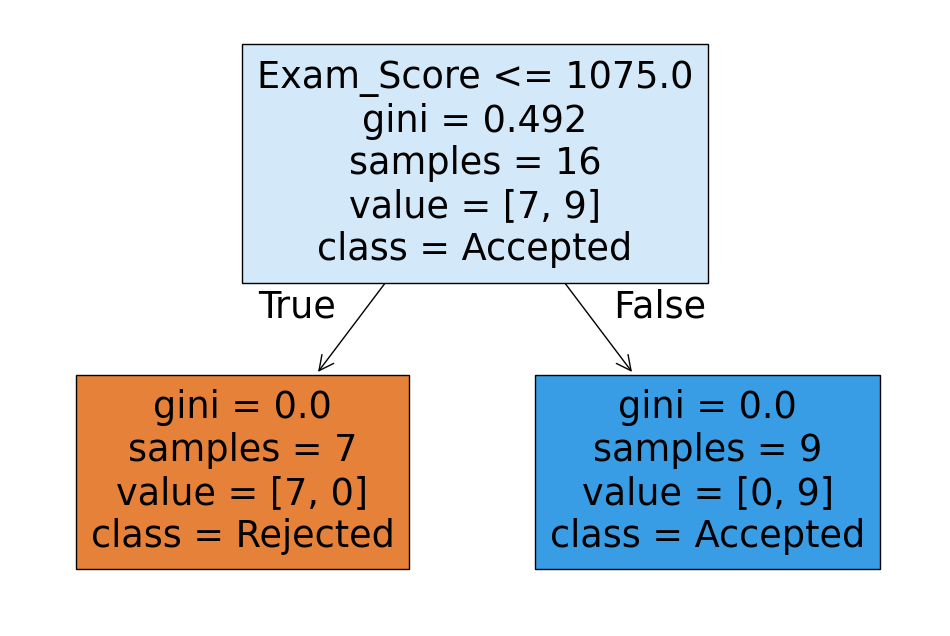

In [ ]:
# Scenario: University Admissions Rulebook
# Imagine you’re an admissions officer at a university. Every day, students apply for admission, and you need to decide whether to accept or reject them.
# Instead of guessing, you build a rulebook (that’s your Decision Tree).

# 📋 The Data
# - Each applicant has:
# - High School GPA (how well they performed academically)
# - Entrance Exam Score (their standardized test performance)
# - Extracurriculars (1 = active in clubs/sports, 0 = not active)
# - Past applications are labeled:
# - 1 = Accepted
# - 0 = Rejected
# This past data is like your training experience.

# 👉 Just like the loan officer uses credit score, income,
#and employment status to decide, here the admissions officer uses GPA, exam scores, and extracurriculars to make decisions.

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

df = pd.read_csv('University Dataset - Sheet1.csv')
df.columns = df.columns.str.strip()

X = df[['HighSchool_GPA', 'Exam_Score', 'Extracurriculars']]
y = df['Admission_Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=3, random_state=42)
model.fit(X_train, y_train)

print(f"Accuracy: {model.score(X_test, y_test):.2%}")

plt.figure(figsize=(12,8))
plot_tree(model, feature_names=X.columns, class_names=['Rejected', 'Accepted'], filled=True)
plt.show()

Accuracy: 0.8
Precision: 0.8
Recall: 0.8
F1 Score: 0.8
ROC-AUC Score: 0.9600000000000001


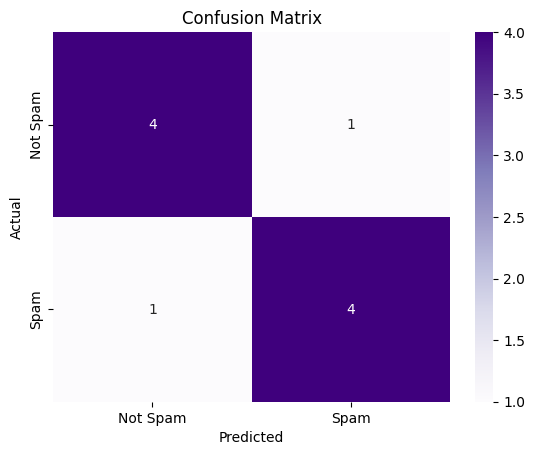

In [ ]:
# Scenario Question: Email Spam Filter
# A company has built a machine learning model to detect spam emails.
# - True labels (y_true): Whether each email was actually spam (1 = Spam, 0 = Not Spam).
# - Predictions (y_pred): What the model guessed.
# - Probabilities (y_prob): How confident the model was in each prediction.
# The company wants to evaluate the model using accuracy, precision, recall, F1 score, ROC-AUC,


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

y_true = [1,0,1,1,0,1,0,0,1,0]
y_pred = [1,0,1,0,0,1,1,0,1,0]
y_prob = [0.9,0.1,0.8,0.4,0.2,0.85,0.6,0.15,0.7,0.3]

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Not Spam', 'Spam'],
            yticklabels=['Not Spam', 'Spam'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()